## Straxferno session 5 - storage system

In [126]:
import os, os.path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import strax
import straxen

pd.options.display.max_colwidth = 1000
st = st_1t = straxen.contexts.xenon1t_dali()
st_nt = straxen.contexts.xenonnt_online()

### Path 1

In [105]:
path = '/dali/lgrandi/xenon1t/strax_converted/processed/181027_0841-event_info-or7hq7ejmy'

  * Use fuzzy loading to get any event_info dataset
  * Check if is storage directories, else add it
  * Check we actually know the plugin
  * Check lineage matches our context

In [106]:
st.key_for('181027_0841', 'event_info')

181027_0841-event_info-or7hq7ejmy

In [107]:
st.is_stored('181027_0841', 'event_info')

True

In [109]:
st.get_array('181027_0841', 'event_info');

In [111]:
st.storage = [strax.DataDirectory('/dali/lgrandi/xenon1t/strax_converted/processed/', readonly=True)]

In [112]:
st.is_stored('181027_0841', 'event_info')

True

In [116]:
# Just checking we got the right folder:
for sf in st.storage:
    try:
        result = sf.find(st.key_for(run_id, data_type))
        print(f"\nFound it: {result}!\n")
        break
    except Exception as e:
        print(e)
        continue
else:
    print("nope :-(")

<strax.storage.files.DataDirectory object at 0x7f255a8ae350> does not accept or provide data type event_info

Found it: ('FileSytemBackend', '/dali/lgrandi/xenon1t/strax_converted/processed/181027_0841-event_info-or7hq7ejmy')!



### Path 2

In [123]:
path = '/scratch/midway2/aalbers/straxferno/181027_0841-event_info-or7hq7ejmy'

In [121]:
st.storage = [strax.DataDirectory('/scratch/midway2/aalbers/straxferno/')]

In [122]:
st.is_stored('181027_0841', 'event_info')

True

### Path 3

In [125]:
path = '/home/aalbers/projects/xnt_pulse_proc/strax_data/007219-external_triggers-ltd2lr56s2'

In [130]:
'external_triggers' in st_nt._plugin_class_registry

False

In [132]:
os.listdir('/home/aalbers/projects/xnt_pulse_proc/strax_data/007219-external_triggers-ltd2lr56s2')

['external_triggers-ltd2lr56s2-metadata.json',
 'external_triggers-ltd2lr56s2-000000']

In [140]:
!cat /home/aalbers/projects/xnt_pulse_proc/strax_data/007219-external_triggers-ltd2lr56s2/external_triggers-ltd2lr56s2-metadata.json

{
    "chunks": [
        {
            "chunk_i": 0,
            "end": 1587131543499999000,
            "filename": "external_triggers-ltd2lr56s2-000000",
            "filesize": 92717,
            "first_endtime": 1587131483049406110,
            "first_time": 1587131483049406100,
            "last_endtime": 1587131521761947640,
            "last_time": 1587131521761947630,
            "n": 6612,
            "nbytes": 112404,
            "run_id": "007219",
            "start": 1587131483000000000
        }
    ],
    "compressor": "blosc",
    "data_kind": "raw_records_aqmon",
    "data_type": "external_triggers",
    "dtype": "[(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8'), (('True if this is a rising edge (falling ADC output)', 'is_rise'), '|b1')]",
    "end": 1587131543499999000,
    "lineage": {
        "external_triggers": [
            "ExternalTriggers",
            "0.0.1",
            {
             

In [137]:
dtype = np.dtype([(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8'), (('True if this is a rising edge (falling ADC output)', 'is_rise'), '|b1')])

In [139]:
strax.load_file('/home/aalbers/projects/xnt_pulse_proc/strax_data/007219-external_triggers-ltd2lr56s2/external_triggers-ltd2lr56s2-000000',
                compressor='blosc',
                dtype=dtype)

array([(1587131483049406100, 1587131483049406110,  True),
       (1587131483049815700, 1587131483049815710, False),
       (1587131483049816240, 1587131483049816250,  True), ...,
       (1587131521761537500, 1587131521761537510,  True),
       (1587131521761947100, 1587131521761947110, False),
       (1587131521761947630, 1587131521761947640,  True)],
      dtype=[(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8'), (('True if this is a rising edge (falling ADC output)', 'is_rise'), '?')])

In [151]:
class ExternalTriggers(strax.Plugin):
    depends_on = 'raw_records'
    dtype = dtype
    pass
    
st_nt.register(ExternalTriggers)

__main__.ExternalTriggers

In [152]:
st_nt.storage = [strax.DataDirectory('/home/aalbers/projects/xnt_pulse_proc/strax_data')]

In [ ]:
external_triggers

In [161]:
st_nt.context_config['fuzzy_for'] = ('external_triggers',)

In [159]:
#st_nt.config

In [156]:
st_nt.show_config()

,option,default,current,applies_to,help
0,storage_converter,False,False,Context,"If True, save data that is loaded from one frontend through all willing other storage frontends."
1,fuzzy_for,(),(),Context,"Tuple of plugin names for which no checks for version, providing plugin, and config will be performed when looking for data."
2,fuzzy_for_options,(),(),Context,Tuple of config options for which no checks will be performed when looking for data.
3,allow_incomplete,False,False,Context,"Allow loading of incompletely written data, if the storage systems support it"
4,allow_rechunk,True,True,Context,Allow rechunking of data during writing.
5,allow_multiprocess,False,False,Context,"Allow multiprocessing.If False, will use multithreading only."
6,allow_shm,False,False,Context,Allow use of /dev/shm for interprocess communication.
7,allow_lazy,True,True,Context,"Allow ""lazy"" processing. Saves memory, but incompatible with multiprocessing and perhaps slightly slower."
8,forbid_creation_of,(),raw_records,Context,"If any of the following datatypes is requested to be created, throw an error instead. Useful to limit descending too far into the dependency graph."
9,store_run_fields,(),"(name, number, tags.name, start, end, livetime, mode)",Context,Tuple of run document fields to store during scan_run.


In [163]:
st_nt.is_stored('007219', 'external_triggers')

True

In [164]:
st_nt.get_array('007219', 'external_triggers')

array([(1587131483049406100, 1587131483049406110,  True),
       (1587131483049815700, 1587131483049815710, False),
       (1587131483049816240, 1587131483049816250,  True), ...,
       (1587131521761537500, 1587131521761537510,  True),
       (1587131521761947100, 1587131521761947110, False),
       (1587131521761947630, 1587131521761947640,  True)],
      dtype=[(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8'), (('True if this is a rising edge (falling ADC output)', 'is_rise'), '?')])

In [173]:
path

'/home/aalbers/projects/xnt_pulse_proc/strax_data/007219-external_triggers-ltd2lr56s2'

In [171]:
loader = strax.FileSytemBackend().loader(path)
next(loader)

[007219.external_triggers: 1587131483sec 0 ns - 1587131543sec 499999000 ns, 6612 items, 0.0 MB/s]

In [172]:
#np.concatenate([x.data for x in strax.FileSytemBackend().loader(path)])


In [168]:
x.data

array([(1587131483049406100, 1587131483049406110,  True),
       (1587131483049815700, 1587131483049815710, False),
       (1587131483049816240, 1587131483049816250,  True), ...,
       (1587131521761537500, 1587131521761537510,  True),
       (1587131521761947100, 1587131521761947110, False),
       (1587131521761947630, 1587131521761947640,  True)],
      dtype=[(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Exclusive end time since unix epoch [ns]', 'endtime'), '<i8'), (('True if this is a rising edge (falling ADC output)', 'is_rise'), '?')])

### Path 4

In [175]:
path = '/home/aalbers/projects/xnt_peak_proc/strax_data/181027_0841-event_info-wnm57jwdgr'

In [176]:
loader = strax.FileSytemBackend().loader(path)
next(loader)

DataNotAvailable: Cannot load data at /home/aalbers/projects/xnt_peak_proc/strax_data/181027_0841-event_info-wnm57jwdgr: it was created with strax 0.8.7, but you have strax 0.11.0. 

In [178]:
import json
with open(f'{path}/event_info-wnm57jwdgr-metadata.json') as f:
    metadata = json.loads(f.read())

In [179]:
df = strax.load_file(
    f'{path}/event_info-wnm57jwdgr-000000',
    compressor=metadata['compressor'],
    dtype=np.dtype(eval(metadata['dtype'])))

/home/aalbers/software/strax/strax/context.py:678: UserWarning: Could not estimate run start time from run metadata: assuming it is 0
  UserWarning)


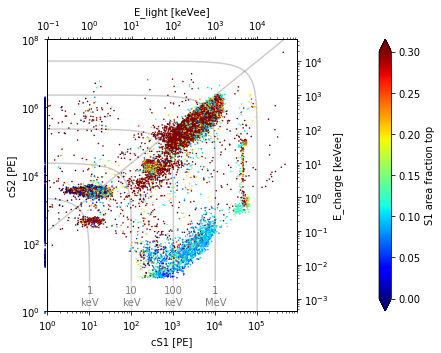

In [180]:
st.event_scatter(run_id, events=df)